# Bertrand paradox

### First method

Choose to random points in a (unit) circle and calculate the length of that chord.

### Second method


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def length(x1, y1, x2, y2):
	return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [5]:
def chord1(r=1):
	theta = np.random.uniform(0, 2*np.pi)
	return r*np.cos(theta), r*np.sin(theta)

In [36]:
def check_len(l1, r=1):
	# Length of the inscribed triangle
	l2 = r*np.sqrt(3) 
	if l1 <= l2:
		return 1 
	else:
		return 0 

In [38]:
avg = 0
n1 = int(1e6)
for i in range(n1):
	x1, y1 = chord1()
	x2, y2 = chord1()

	avg += check_len(length(x1, y1, x2, y2))

avg /= n 
print(avg) 	# aprox 2/3

0.666559


In [54]:
# Saving data for plot
n_plot = 10000
x1 = []
y1 = []
x2 = []
y2 = []
for i in range(n_plot):
	temp_x1, temp_y1 = chord1()
	x1.append(temp_x1)
	y1.append(temp_y1)
	temp_x2, temp_y2 = chord1()
	x2.append(temp_x2)
	y2.append(temp_y2)

In [55]:
# Append x and y values intercalated
x_values = []
for i in range(n_plot):
	x_values.append(x1[i])
	x_values.append(x2[i])

y_values = []
for i in range(n_plot):
	y_values.append(y1[i])
	y_values.append(y2[i])

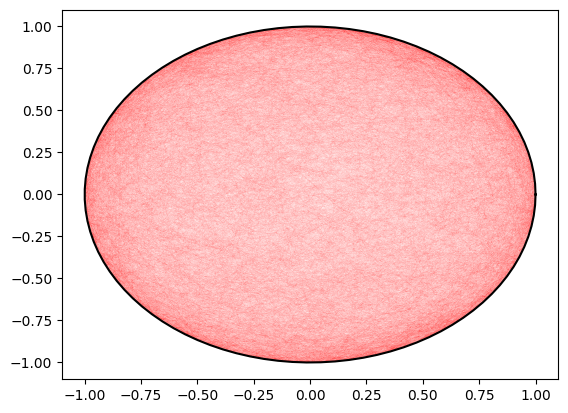

In [57]:
# PLotting 
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

plt.plot(x_values, y_values, color='red', linewidth=0.005)
plt.plot(x, y, 'k')